### Importer le dataset

In [14]:
import numpy as np 
import pandas as pd

import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.datasets  import load_iris
from sklearn.cluster import KMeans

from sklearn.metrics import confusion_matrix , classification_report


### Importer le dataset

In [15]:
iris = load_iris()

In [16]:
x = pd.DataFrame(iris.data)
x.columns = ['Sepal_Length', 'sepal_width', 'Petal_Length','Petal_width']
Y = pd.DataFrame(iris.target)
Y.columns = ["Class"]
x.head()

,Sepal_Length,sepal_width,Petal_Length,Petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [17]:
Y.head()

,Class
0,0
1,0
2,0
3,0
4,0


### Analyser le dataset

In [18]:
print("ligne_class: ", x.shape , "taille :", x.size , "dimension : ", x.ndim)

ligne_class:  (150, 4) taille : 600 dimension :  2


In [19]:
x.dtypes

Sepal_Length    float64
sepal_width     float64
Petal_Length    float64
Petal_width     float64
dtype: object

In [20]:
x.isnull().sum()

Sepal_Length    0
sepal_width     0
Petal_Length    0
Petal_width     0
dtype: int64

In [21]:
x.describe()

,Sepal_Length,sepal_width,Petal_Length,Petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Visualiser le dataset

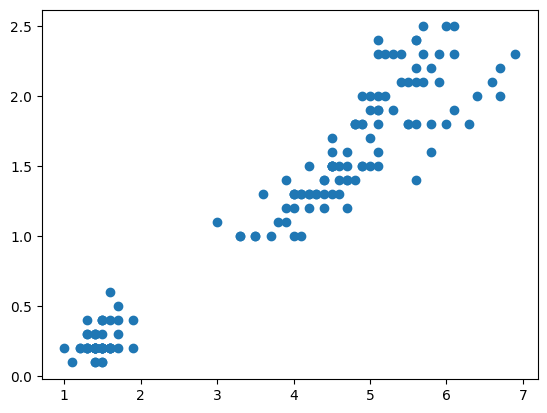

In [22]:
plt.scatter(x["Petal_Length"] , x["Petal_width"])

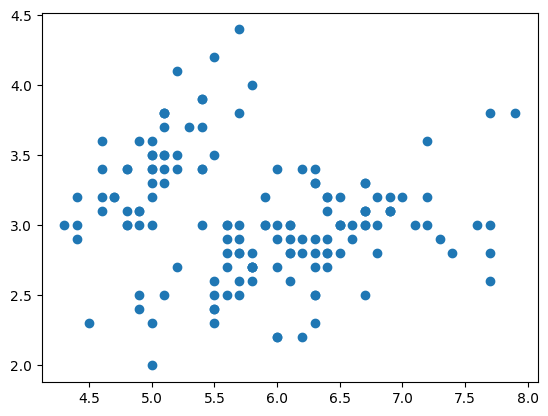

In [23]:
plt.scatter(x["Sepal_Length"] , x["sepal_width"])

#### Méthode du coude (Elbow method)
- permet de trouver le K : sur la courbe on choisit ou la baisse est plus lente
- Inertie faible → les points sont proches du centre de leur cluster → bon regroupement.

- Inertie élevée → les points sont éloignés des centres → mauvais regroupement.

In [24]:
### creer un model
## on la somme de chaque point parrapport au centre de son clustering 
inert = []

for i in range(1 , 11):
    
    model_kmeans = KMeans(n_clusters= i)
    model_kmeans.fit(x)
    inert.append(model_kmeans.inertia_)
    


####  Tracer la courbe

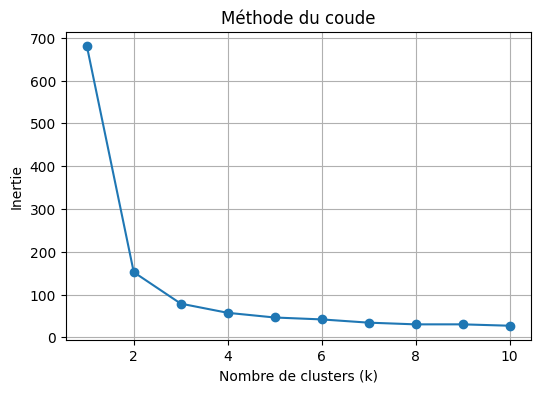

In [25]:
plt.figure(figsize=(6, 4))
plt.plot(range(1,11), inert, marker='o')
plt.title("Méthode du coude")
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Inertie")
plt.grid(True)
plt.savefig("../Images/elbow_method.png")

In [26]:
## modele kmeans 
model_kmeans = KMeans(3)

## entrainer du model 
model_kmeans.fit(x)

## la preduction 
y_pred = model_kmeans.predict(x)

y_pred


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

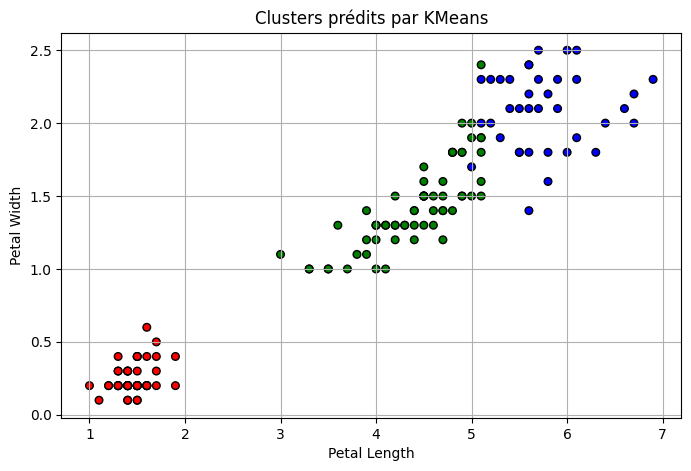

In [27]:
## 
colorL = np.array(['green' , 'red' , 'blue'])


plt.figure(figsize=(8, 5))
plt.scatter(x["Petal_Length"], x["Petal_width"], c=colorL[y_pred], s=30, edgecolor='k')
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("Clusters prédits par KMeans")
plt.grid(True)
plt.savefig("../Images/kmeans_clusters.png")


In [28]:
## matrice de confusion 

print("Confusion Matrix:")
print(confusion_matrix(Y, y_pred))

Confusion Matrix:
[[ 0 50  0]
 [48  0  2]
 [14  0 36]]


In [29]:
## 
print("Classification de rapport")
print(classification_report(Y, y_pred))

Classification de rapport
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.00      0.00      0.00        50
           2       0.95      0.72      0.82        50

    accuracy                           0.24       150
   macro avg       0.32      0.24      0.27       150
weighted avg       0.32      0.24      0.27       150

